# Project - Data Cleaning

## Introduction
In this lab, we'll make use of everything we've learned about pandas, data cleaning, and Exploratory Data Analysis. In order to complete this lab, you'll have to make import, clean, combine, reshape, and visualize data to answer questions provided, as well as your own questions!

## Objectives
You will be able to:
* Show mastery of the content covered in this section

## The Dataset
In this lab, we'll work with the comprehensive [Super Heroes Dataset](https://www.kaggle.com/claudiodavi/superhero-set/data), which can be found on Kaggle!

## Goals
* Use all available pandas knowledge to clean the dataset and deal with null values
* Use Queries and aggregations to group the data into interesting subsets as needed
* Use descriptive statistics and data visualization to find answers to questions we may have about the data. 

## Getting Started

In the cell below:

* Import and alias pandas as `pd`
* Import and alias numpy as `np`
* Import and alias seaborn as `sns`
* Import and alias matplotlib.pyplot as `plt`
* Set matplotlib visualizations to display inline in the notebook

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

For this lab, our dataset is split among two different sources--`heroes_information.csv` and `super_hero_powers.csv`.

Use pandas to read in each file and store them in DataFrames in the appropriate variables below. Then, display the head of each to ensure that everything loaded correctly.  

In [2]:
heroes_df = pd.read_csv('heroes_information.csv')
powers_df = pd.read_csv('super_hero_powers.csv')
heroes_df.tail()
powers_df.head()

,hero_names,Agility,Accelerated Healing,Lantern Power Ring,Dimensional Awareness,Cold Resistance,Durability,Stealth,Energy Absorption,Flight,...,Web Creation,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient
0,3-D Man,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,A-Bomb,False,True,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,Abe Sapien,True,True,False,False,True,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,Abin Sur,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,Abomination,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


It looks as if the heroes information dataset contained an index column.  We did not specify that this dataset contained an index column, because we hadn't seen it yet. Pandas does not know how to tell apart an index column from any other data, so it stored it with the column name `Unnamed: 0`.  

Our DataFrame provided row indices by default, so this column is not needed.  Drop it from the DataFrame in place in the cell below, and then display the head of `heroes_df` to ensure that it worked properly. 

In [3]:
heroes_df.drop(columns='Unnamed: 0', inplace=True)
heroes_df.head()

,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight
0,A-Bomb,Male,yellow,Human,No Hair,203.0,Marvel Comics,-,good,441.0
1,Abe Sapien,Male,blue,Icthyo Sapien,No Hair,191.0,Dark Horse Comics,blue,good,65.0
2,Abin Sur,Male,blue,Ungaran,No Hair,185.0,DC Comics,red,good,90.0
3,Abomination,Male,green,Human / Radiation,No Hair,203.0,Marvel Comics,-,bad,441.0
4,Abraxas,Male,blue,Cosmic Entity,Black,-99.0,Marvel Comics,-,bad,-99.0


## Familiarize Yourself With the Dataset

The first step in our Exploratory Data Analysis will be to get familiar with the data.  This step includes:

* Understanding the dimensionality of your dataset
* Investigating what type of data it contains, and the data types used to store it
* Discovering how missing values are encoded, and how many there are
* Getting a feel for what information it does and doesnt contain

In the cell below, get the descriptive statistics of each DataFrame.  

In [4]:
print('**Heroes Info**')
print(heroes_df.info())

print(heroes_df.describe())

print('   ')

print('**Powers Info**')
print(powers_df.info())

powers_df.describe()

**Heroes Info**
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 734 entries, 0 to 733
Data columns (total 10 columns):
name          734 non-null object
Gender        734 non-null object
Eye color     734 non-null object
Race          734 non-null object
Hair color    734 non-null object
Height        734 non-null float64
Publisher     719 non-null object
Skin color    734 non-null object
Alignment     734 non-null object
Weight        732 non-null float64
dtypes: float64(2), object(8)
memory usage: 57.4+ KB
None
           Height      Weight
count  734.000000  732.000000
mean   102.254087   43.855191
std    139.624543  130.823733
min    -99.000000  -99.000000
25%    -99.000000  -99.000000
50%    175.000000   62.000000
75%    185.000000   90.000000
max    975.000000  900.000000
   
**Powers Info**
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 667 entries, 0 to 666
Columns: 168 entries, hero_names to Omniscient
dtypes: bool(167), object(1)
memory usage: 114.1+ KB
None


,hero_names,Agility,Accelerated Healing,Lantern Power Ring,Dimensional Awareness,Cold Resistance,Durability,Stealth,Energy Absorption,Flight,...,Web Creation,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient
count,667,667,667,667,667,667,667,667,667,667,...,667,667,667,667,667,667,667,667,667,667
unique,667,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
top,Blue Beetle II,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
freq,1,425,489,656,642,620,410,541,590,455,...,653,651,665,658,666,666,666,665,665,665


## Dealing with Null Values

Starting in the cell below, detect and deal with any null values in either data frame.  Then, explain your methodology for detecting and dealing with outliers in the markdown section below.  Be sure to explain your strategy for dealing with null values in numeric columns, as well as your strategy for dealing with null values in non-numeric columns.  

Note that if you need to add more cells to write code in, you can do this by:

**1.** Highlighting a cell and then pressing `ESC` to enter command mode.  
**2.** Press `A` to add a cell above the highlighted cell, or `B` to add a cell below the highlighted cell. 

Describe your strategy below this line:
____________________________________________________________________________________________________________________________
**Heroes**
1. I first detected Nulls using .isnull().any(). Since when we include '-' this data set contains many missing values, I opted to retain NaN values. For categorical data I am treating NaN as its own category. For numberic data I am using bins. The 2 NaNs in Weight I replaces with -99.0 to match the other empty values in that column.  

2. Using value counts I was able to detect that Gender used (-) for missing information. I replaced (-) with NaN and treated it as its own category. I first checked to ensure that(-) didn't indicate a third Gender option.  It appeared that many of the columns used this marker. I replaced all of them with NaN.
3. I discovered that -99 was filling in as null for Height and Weight. Since these columns are numerical I chose to fill in null values with median so that I can better analyze the data. This will skew the data towards the median 
    Median Height =183  Mean Height=187.244 (pulled by outlier though)
    Median Weight = 81 Mean 112.31 (mean pulled by extremely large outlier, Median is accurate value)
4. No remaining nulls detected




In [5]:
heroes_df.isnull().any() #Publisher, Weight
heroes_df.Publisher.isna().sum() #15
heroes_df.Weight.isna().sum()#2


heroes_df.columns
heroes_df['Height'].value_counts()
heroes_df.loc[heroes_df.Gender == '-']

#heroes_df.replace(to_replace='-', value='NaN', inplace=True)


#heroes_df.Weight.fillna(value=-99.0, inplace=True)

#heroes_df.isnull().any()

#heroes_df['Weight_bin']= None            Why didn't this work????!!!!!!!!
#for value in heroes_df['Weight']:
 #   if value <0:
  #      heroes_df['Weight_bin'] = 0
   # elif 0 <= value <50 :
    #    heroes_df['Weight_bin'] = 1
 #   elif 50 <= value <100:
  #      heroes_df['Weight_bin'] = 2
   # elif 100 <= value < 150:
    #    heroes_df['Weight_bin'] = 3
    #elif 150 <= value <200:
#        heroes_df['Weight_bin'] = 4
 #   elif 200 <= value <250:
  #      heroes_df['Weight_bin'] = 5
   # elif 250 <= value <300:
    #    heroes_df['Weight_bin'] = 6
#    elif 300 <= value <350:
#        heroes_df['Weight_bin'] = 7
 #   elif 350 <= value < 400:
     #   heroes_df['Weight_bin'] = 8
  #  elif 400 <= value < 450:
   #     heroes_df['Weight_bin'] = 9
    #else:
      #  heroes_df['Weight_bin'] = 10
        
bins = [-100, 0, 50, 100, 150, 200, 250, 300, 350, 400, 450, 500, 1000]

heroes_df['Weight_bin']=pd.cut(heroes_df['Weight'], bins, labels=False)
heroes_df.head()

height_bins=[-100, 0, 50, 100, 150, 200, 250, 300, 1000]
heroes_df['Height_bin']=pd.cut(heroes_df['Height'], height_bins, labels=False)
heroes_df.head()

,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight,Weight_bin,Height_bin
0,A-Bomb,Male,yellow,Human,No Hair,203.0,Marvel Comics,-,good,441.0,9.0,5
1,Abe Sapien,Male,blue,Icthyo Sapien,No Hair,191.0,Dark Horse Comics,blue,good,65.0,2.0,4
2,Abin Sur,Male,blue,Ungaran,No Hair,185.0,DC Comics,red,good,90.0,2.0,4
3,Abomination,Male,green,Human / Radiation,No Hair,203.0,Marvel Comics,-,bad,441.0,9.0,5
4,Abraxas,Male,blue,Cosmic Entity,Black,-99.0,Marvel Comics,-,bad,-99.0,0.0,0


In [6]:
heroes_df

,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight,Weight_bin,Height_bin
0,A-Bomb,Male,yellow,Human,No Hair,203.0,Marvel Comics,-,good,441.0,9.0,5
1,Abe Sapien,Male,blue,Icthyo Sapien,No Hair,191.0,Dark Horse Comics,blue,good,65.0,2.0,4
2,Abin Sur,Male,blue,Ungaran,No Hair,185.0,DC Comics,red,good,90.0,2.0,4
3,Abomination,Male,green,Human / Radiation,No Hair,203.0,Marvel Comics,-,bad,441.0,9.0,5
4,Abraxas,Male,blue,Cosmic Entity,Black,-99.0,Marvel Comics,-,bad,-99.0,0.0,0
5,Absorbing Man,Male,blue,Human,No Hair,193.0,Marvel Comics,-,bad,122.0,3.0,4
6,Adam Monroe,Male,blue,-,Blond,-99.0,NBC - Heroes,-,good,-99.0,0.0,0
7,Adam Strange,Male,blue,Human,Blond,185.0,DC Comics,-,good,88.0,2.0,4
8,Agent 13,Female,blue,-,Blond,173.0,Marvel Comics,-,good,61.0,2.0,4
9,Agent Bob,Male,brown,Human,Brown,178.0,Marvel Comics,-,good,81.0,2.0,4


## Joining, Grouping, and Aggregating

In the cell below, join the two DataFrames.  Think about which sort of join you should use, as well as which columns you should join on.  Rename columns and manipulate as needed.  

**_HINT:_** If the join throws an error message, consider settin the the column you want to join on as the index for each DataFrame.  

In [7]:
#heroes_df.set_index('name', inplace=True)
#powers_df.set_index('hero_names', inplace=True)
joined_df=heroes_df.join(powers_df, how='inner')

In [8]:
joined_df
#joined_df.drop(columns='Unnamed: 0', inplace=True)
joined_df
joined_df

,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight,...,Web Creation,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient
0,A-Bomb,Male,yellow,Human,No Hair,203.0,Marvel Comics,-,good,441.0,...,False,False,False,False,False,False,False,False,False,False
1,Abe Sapien,Male,blue,Icthyo Sapien,No Hair,191.0,Dark Horse Comics,blue,good,65.0,...,False,False,False,False,False,False,False,False,False,False
2,Abin Sur,Male,blue,Ungaran,No Hair,185.0,DC Comics,red,good,90.0,...,False,False,False,False,False,False,False,False,False,False
3,Abomination,Male,green,Human / Radiation,No Hair,203.0,Marvel Comics,-,bad,441.0,...,False,False,False,False,False,False,False,False,False,False
4,Abraxas,Male,blue,Cosmic Entity,Black,-99.0,Marvel Comics,-,bad,-99.0,...,False,False,False,False,False,False,False,False,False,False
5,Absorbing Man,Male,blue,Human,No Hair,193.0,Marvel Comics,-,bad,122.0,...,False,False,False,False,False,False,False,False,False,False
6,Adam Monroe,Male,blue,-,Blond,-99.0,NBC - Heroes,-,good,-99.0,...,False,False,False,False,False,False,False,False,False,False
7,Adam Strange,Male,blue,Human,Blond,185.0,DC Comics,-,good,88.0,...,False,False,False,False,False,False,False,False,False,False
8,Agent 13,Female,blue,-,Blond,173.0,Marvel Comics,-,good,61.0,...,False,False,False,False,False,False,False,False,False,False
9,Agent Bob,Male,brown,Human,Brown,178.0,Marvel Comics,-,good,81.0,...,False,False,False,False,False,False,False,False,False,False


In [9]:
joined_df['Height_bin']

0      5
1      4
2      4
3      5
4      0
5      4
6      0
7      4
8      4
9      4
10     4
11     4
12     4
13     4
14     0
15     0
16     4
17     5
18     0
19     6
20     4
21     0
22     4
23     0
24     4
25     4
26     0
27     4
28     4
29     5
      ..
637    5
638    0
639    4
640    4
641    4
642    4
643    4
644    4
645    4
646    4
647    0
648    4
649    0
650    4
651    4
652    0
653    0
654    0
655    4
656    4
657    5
658    0
659    4
660    4
661    4
662    4
663    4
664    0
665    4
666    4
Name: Height_bin, Length: 667, dtype: int64

In the cell below, subset male and female heroes into different dataframes.  Create a scatterplot of the height and weight of each hero, with weight as the y-axis.  Plot both the male and female heroes subset into each dataframe, and make the color for each point in the scatterplot correspond to the gender of the superhero.

[]

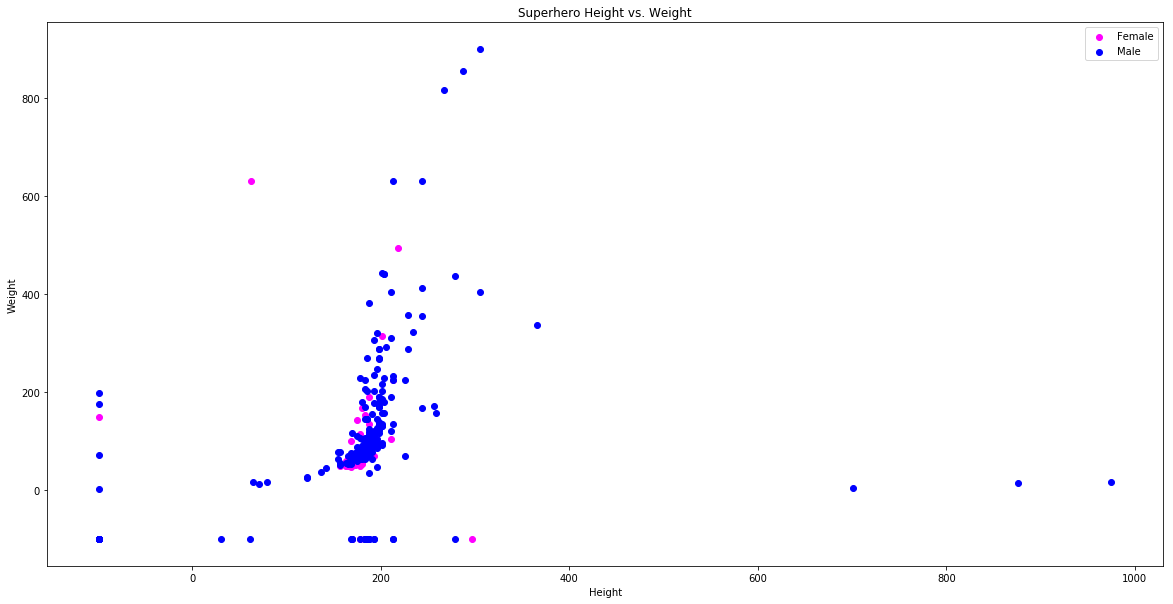

In [10]:
female_heroes_df=joined_df.loc[joined_df['Gender']=='Female']
male_heroes_df=joined_df.loc[joined_df['Gender']=='Male']

plt.figure(figsize=(20, 10))
plt.scatter(x=female_heroes_df['Height'], y=female_heroes_df['Weight'], color='Magenta', label='Female')
plt.scatter(x=male_heroes_df['Height'], y=male_heroes_df['Weight'], color = 'Blue', label='Male')
plt.xlabel('Height')
plt.ylabel('Weight')
plt.title('Superhero Height vs. Weight')
plt.legend()
plt.plot()

## Some Initial Investigation

Next, slice the DataFrame as needed and visualize the distribution of heights and weights by gender.  You should have 4 total plots.  

In the cell below:

* Slice the DataFrame into separate DataFrames by gender
* Complete the `show_distplot` function.  This helper function should take in a DataFrame, a string containing the gender we want to visualize, and and the column name we want to visualize by gender. The function should display a distplot visualization from seaborn of the column/gender combination.  

Hint: Don't forget to check the [seaborn documentation for distplot](https://seaborn.pydata.org/generated/seaborn.distplot.html) if you have questions about how to use it correctly! 

In [11]:
def show_distplot(dataframe, gender, column_name):
    if gender.lower() == 'female':
        female_df=dataframe.loc[dataframe['Gender']=='Female']
        series=female_df[column_name]
        sns.distplot(series)
    elif gender.lower() == 'male':
        male_df=dataframe.loc[dataframe['Gender']=='Male']
        series=male_df[column_name]
        sns.distplot(series)
    else:
        return 'Error'

        


/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


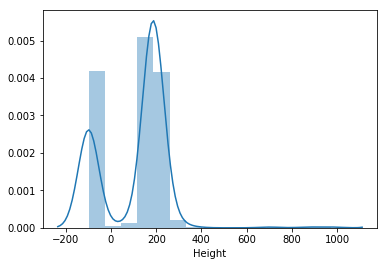

In [12]:
show_distplot(joined_df, 'male', 'Height')

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


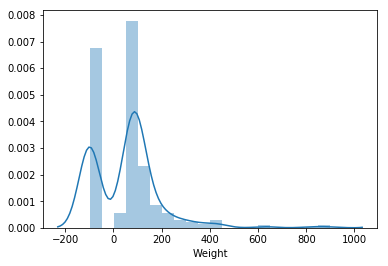

In [13]:
joined_df.Weight.fillna(value=-99.0, inplace=True)
show_distplot(joined_df, 'male', 'Weight')


/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


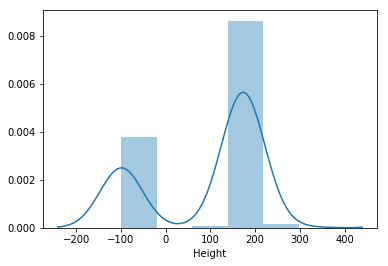

In [14]:
show_distplot(joined_df, 'Female', 'Height')

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


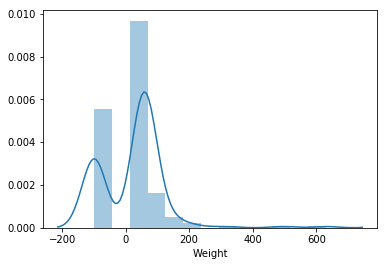

In [15]:
show_distplot(joined_df, 'female', 'Weight')

Discuss your findings from the plots above, with respect to the distibution of height and weight by gender.  Your explanation should include discussion of any relevant summary statistics, including mean, median, mode, and the overall shape of each distribution.  

Wite your answer below this line:
____________________________________________________________________________________________________________________________



### Sample Question: Most Common Powers

The rest of this notebook will be left to you to investigate the dataset by formulating your own questions, and then seeking answers using pandas and numpy.  Every answer should include some sort of visualization, when appropriate. Before moving on to formulating your own questions, use the dataset to answer the following questions about superhero powers:

* What are the 5 most common powers overall? 

Super Strength           
Stamina                  
Durability               
Super Speed              
Agility                 
* What are the 5 most common powers in the Marvel Universe?

Super Strength             
Stamina                   
Durability                 
Super Speed                
Agility    

* What are the 5 most common powers in the DC Universe?

Super Strength                     
Stamina                            
Agility                           
Durability                         
Super Speed

In [16]:
powers_description=powers_df.describe()
powers_description.iloc[3].sort_values()


hero_names                 1
Super Strength           360
Stamina                  378
Durability               410
Super Speed              418
Agility                  425
Flight                   455
Accelerated Healing      489
Reflexes                 503
Intelligence             509
Energy Blasts            520
Stealth                  541
Marksmanship             548
Invulnerability          550
Longevity                554
Weapons Master           562
Telepathy                575
Enhanced Senses          578
Force Fields             581
Energy Absorption        590
Teleportation            595
Enhanced Hearing         595
Immortality              598
Shapeshifting            601
Jump                     602
Telekinesis              606
Natural Weapons          609
Weapon-based Powers      609
Size Changing            612
Energy Manipulation      615
                        ... 
Grim Reaping             664
Power Sense              664
Seismic Power            664
Projection    

In [17]:
columns_values=joined_df.columns
publisher_df=joined_df.groupby('Publisher').sum()
publisher_df.iloc[1,:].sort_values(ascending=False)

publisher_df.iloc[11, :].sort_values(ascending=False)

joined_df['Publisher'].value_counts()
#marvel_df=joined_df.loc[joined_df['Publisher']=='Marvel Comics']

#marvel_columns=marvel_df.columns
#marvel_df.pivot

#by_publisher_df.loc[by_publisher_df['']=='Marvel Comics' or 'DC Comics']

Marvel Comics        341
DC Comics            202
NBC - Heroes          18
Dark Horse Comics     17
George Lucas          13
Image Comics          13
Star Trek              6
HarperCollins          5
SyFy                   5
IDW Publishing         4
Icon Comics            4
ABC Studios            4
Team Epic TV           4
Wildstorm              3
Shueisha               3
Sony Pictures          2
South Park             1
Rebellion              1
Universal Studios      1
J. R. R. Tolkien       1
Hanna-Barbera          1
Microsoft              1
Titan Books            1
J. K. Rowling          1
Name: Publisher, dtype: int64

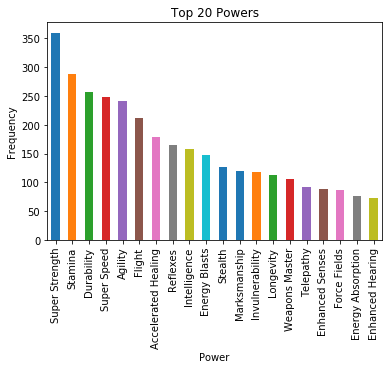

In [18]:
joined_sums=joined_df.sum()
power_frequency=joined_sums[12:180]
power_frequency.sort_values(ascending=False, inplace=True)
top_twenty_powers=power_frequency[0:20]

top_twenty_powers.plot.bar()
plt.title('Top 20 Powers')
plt.xlabel('Power')
plt.ylabel('Frequency')
plt.show()

Analyze the results you found above to answer the following question:

How do the top 5 powers in the Marvel and DC universes compare?  Are they similar, or are there significant differences? How do they compare to the overall trends in the entire Superheroes dataset?

Wite your answer below this line:
____________________________________________________________________________________________________________________________

They are very similar and similar to the overall trends. This similarity to overall trends is likely because the trends are influenced tremendously by these two publishers which together represent 543/666 superheroes analyzed
### Your Own Investigation

For the remainder of this lab, you'll be focusing on coming up with and answering your own question, just like we did above.  Your question should not be overly simple, and should require both descriptive statistics and data visualization to answer.  In case you're unsure of what questions to ask, some sample questions have been provided below.

Pick one of the following questions to investigate and answer, or come up with one of your own!

* Which powers have the highest chance of co-occuring in a hero (e.g. super strength and flight), and does this differ by gender?
* Is there a relationship between a hero's height and weight and their powerset?
* What is the distribution of skin colors amongst alien heroes?

Explain your question below this line:
____________________________________________________________________________________________________________________________



Some sample cells have been provided to give you room to work. If you need to create more cells, you can do this easily by:

1. Highlighting a cell and then pressing `esc` to enter command mode.
1. Pressing `b` to add a cell below the currently highlighted cell, or `a` to add one above it.  

Be sure to include thoughtful, well-labeled visualizations to back up your analysis!

**Powers by Race**

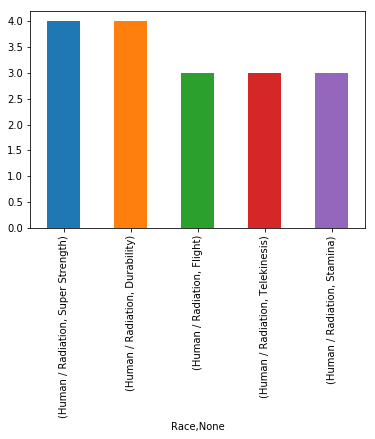

Race                 
Human  Super Strength    95.0
       Stamina           78.0
       Super Speed       70.0
       Durability        65.0
       Agility           62.0
dtype: float64

In [32]:
joined_df['Race'].value_counts()
    #Human                 193
    #Mutant                 60
    #God / Eternal          13
    #Cyborg                 11
    #Human / Radiation      11


human=joined_df.loc[joined_df['Race'] == 'Human']
mutant=joined_df.loc[joined_df['Race'] == 'Mutant']
god_eternal=joined_df.loc[joined_df['Race'] == 'God / Eternal']
cyborg=joined_df.loc[joined_df['Race'] == 'Cyborg']
human_radiation=joined_df.loc[joined_df['Race'] == 'Human / Radiation']

human_powers=pd.pivot_table(human, index='Race', aggfunc=sum)
human_powers_sorted=human_powers.stack().sort_values(ascending=False)
top_human_powers=human_powers_sorted[4:9]


mutant_powers=pd.pivot_table(mutant, index='Race', aggfunc=sum)
mutant_powers_sorted=mutant_powers.stack().sort_values(ascending=False)
top_mutant_powers=human_powers_sorted[4:9]

god_eternal_powers=pd.pivot_table(god_eternal, index='Race', aggfunc=sum)
god_eternal_powers_sorted=god_eternal_powers.stack().sort_values(ascending=False)
top_god_eternal_powers=god_eternal_powers_sorted[4:9]

cyborg_powers=pd.pivot_table(cyborg, index='Race', aggfunc=sum)
cyborg_powers_sorted=cyborg_powers.stack().sort_values(ascending=False)
top_cyborg_powers=cyborg_powers_sorted[4:9]

human_radiation_powers=pd.pivot_table(human_radiation, index='Race', aggfunc=sum)
human_radiation_powers_sorted=human_radiation_powers.stack().sort_values(ascending=False)
top_human_radiation_powers=human_radiation_powers_sorted[4:9]

top_human_radiation_powers.plot.bar()
plt.show()


#powers_by_race.iloc[1].sort_values(ascending=False)

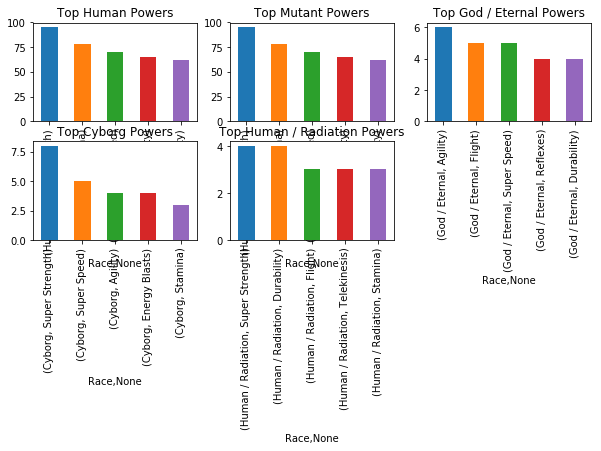

In [26]:
new_figure = plt.figure(figsize=(10,4))

ax = new_figure.add_subplot(231)
ax2 = new_figure.add_subplot(232)
ax3 = new_figure.add_subplot(233)
ax4 = new_figure.add_subplot(234)
ax5 = new_figure.add_subplot(235)

top_human_powers.plot.bar(ax=ax)
ax.set_title('Top Human Powers')

top_mutant_powers.plot.bar(ax=ax2)
ax2.set_title('Top Mutant Powers')

top_god_eternal_powers.plot.bar(ax=ax3)
ax3.set_title('Top God / Eternal Powers')

top_cyborg_powers.plot.bar(ax=ax4)
ax4.set_title('Top Cyborg Powers')

top_human_radiation_powers.plot.bar(ax=ax5)
ax5.set_title('Top Human / Radiation Powers')
ax5.set_xlabel('')
plt.show()


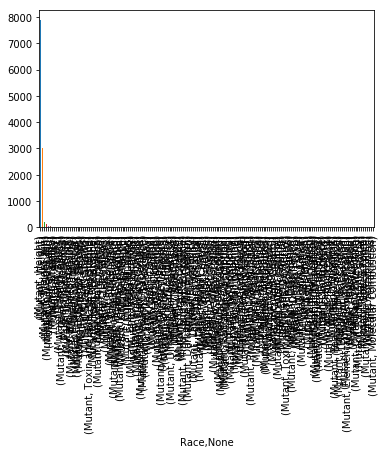

In [33]:
human_powers

,Accelerated Healing,Adaptation,Agility,Animal Attributes,Animal Control,Animal Oriented Powers,Animation,Anti-Gravity,Astral Projection,Astral Travel,...,Vitakinesis,Wallcrawling,Water Control,Weapon-based Powers,Weapons Master,Weather Control,Web Creation,Weight,Weight_bin,Wind Control
Race,,,,,,,,,,,,,,,,,,,,,
Human,53.0,1.0,62.0,7.0,4.0,13.0,1.0,0.0,7.0,0.0,...,1.0,12.0,2.0,18.0,29.0,1.0,3.0,9950.0,359.0,0.0


## Summary

In this lab, we demonstrated our mastery of:
* Using all of our Pandas knowledge to date to clean the dataset and deal with null values
* Using Queries and aggregations to group the data into interesting subsets as needed
* Using descriptive statistics and data visualization to find answers to questions we may have about the data